# minimos cuadrados

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel("Datos.xlsx", index_col ="Nombre")

In [3]:
df.head()

,X1,X2,Y
Nombre,,,
Luis,400,20,0
Francisco,450,35,0
Maria,500,25,0
Alvaro,600,15,0
Soledad,600,30,0


In [4]:
# Partir el data set entre entrenamiento y pruebaç
X = df[["X1","X2"]]
Y = df[["Y"]]
np.random.seed(1234)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(Xtrain,Ytrain) # entrenar

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_predtemp = reg.predict(Xtest) # predecir 

In [8]:
Ypred= np.rint(y_predtemp)

In [9]:
accuracy_score(Ytest,Ypred)

1.0

In [10]:
reg.coef_

array([[0.00084535, 0.0129884 ]])

In [11]:
reg.intercept_

array([-0.66095062])

In [12]:
confusion_matrix(Ytest,Ypred)

array([[5, 0],
       [0, 2]], dtype=int64)

# vecinos mas cercanos

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
vec = KNeighborsClassifier(n_neighbors=5)

In [15]:
vec.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
Ypred = vec.predict(Xtest)

In [17]:
Ypred

array([1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [18]:
accuracy_score(Ytest,Ypred)

0.8571428571428571

In [19]:
confusion_matrix(Ytest,Ypred)

array([[4, 1],
       [0, 2]], dtype=int64)

In [20]:
acc=[]
k=[]
for i in range(2,17):
    vec = KNeighborsClassifier(n_neighbors=i)
    vec.fit(Xtrain,Ytrain)
    Ypred = vec.predict(Xtest)
    acc.append(100*accuracy_score(Ytest,Ypred))
    k.append(i)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [21]:
import matplotlib.pyplot as plt

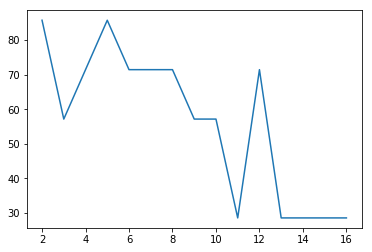

In [22]:
plt.plot(k,acc)